In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style="ticks")


# Build Dataset

In [2]:
f_coocorrence  = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____06e74a0146_61dcdb92f7_sub_True"
f_most_popular = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____06e74a0146_d5789bc4c1_sub_True"
f_model        = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____06e74a0146_80fe3195ca_sub_True"

files = [f_model, f_coocorrence]
names = ["model", 'coocorrence']

path = files[0]+'/eval_dataset.csv'
df   = pd.read_csv(path).reset_index()

df.head()

,index,Unnamed: 0,SessionID,ItemID,Timestamp,event_type_idx,event_search,domain_count,item_id_count,event_type_click,...,average_precision,precision_at_1,mrr_at_5,mrr_at_10,ndcg_at_5,ndcg_at_10,ndcg_at_15,ndcg_at_20,ndcg_at_50,ndcg_ml
0,0,0,0,1748830,2019-10-20 23:29:11.646,2,[18752],0,1868.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209519
1,1,1,1,228737,2019-10-07 23:46:48.382,2,[18752],0,34.0,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.867699
2,2,2,2,1909110,2019-10-01 17:22:20.697,2,[18752],0,76.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,3,3,3,1197370,2019-10-12 14:03:21.871,2,[18752],0,100.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,4,4,4,2049207,2019-09-30 18:53:33.520,2,[18752],0,181.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 82 columns):
index                                   1000 non-null int64
Unnamed: 0                              1000 non-null int64
SessionID                               1000 non-null int64
ItemID                                  1000 non-null int64
Timestamp                               1000 non-null object
event_type_idx                          1000 non-null int64
event_search                            1000 non-null object
domain_count                            1000 non-null int64
item_id_count                           1000 non-null float64
event_type_click                        1000 non-null int64
domain_id                               1000 non-null object
condition                               1000 non-null object
category_id                             1000 non-null object
item_id                                 1000 non-null int64
price                                   1000 no

In [4]:
df.columns

Index(['index', 'Unnamed: 0', 'SessionID', 'ItemID', 'Timestamp',
       'event_type_idx', 'event_search', 'domain_count', 'item_id_count',
       'event_type_click', 'domain_id', 'condition', 'category_id', 'item_id',
       'price', 'product_id', 'title', 'category_idx', 'condition_idx',
       'domain_idx', 'last_ItemID', 'last_category_idx', 'last_product_id',
       'last_ItemID_title', 'last_event_search', 'last_event_type_idx',
       'last_title_search', 'step', 'previous_t', 'diff_Timestamp',
       'int_Timestamp', 'cum_Timestamp', 'price_norm', 'last_price_norm',
       'diff_price_norm', 'last_domain_idx', 'min_last_price_norm',
       'max_last_price_norm', 'mean_last_price_norm', 'sum_last_price_norm',
       'visit', 'step_history', 'timestamp_history', 'cum_timestamp_history',
       'event_type_idx_history', 'category_idx_history',
       'condition_idx_history', 'domain_idx_history', 'product_id_history',
       'price_history', 'ItemID_history', 'title_search_history

In [5]:
features = [
       'last_category_idx', 'last_product_id',
       'last_event_type_idx', 'step', 'diff_Timestamp',
       'int_Timestamp', 'cum_Timestamp', 'last_price_norm',
       'diff_price_norm', 'last_domain_idx', 'min_last_price_norm',
       'max_last_price_norm', 'mean_last_price_norm', 'sum_last_price_norm',
       'mode_category_idx_history', 'mode_condition_idx_history',
       'mode_domain_idx_history', 'mode_product_id_history',
       'mode_event_type_idx_history', 'count_mode_category_idx_history',
       'count_mode_condition_idx_history', 'count_mode_domain_idx_history',
       'count_mode_product_id_history', 'count_mode_event_type_idx_history',
       'count_event_type_idx_history__search',
       'count_event_type_idx_history__view', 'count_condition_idx__new',
       'count_condition_idx__used', 'perc_newlest_search', 'perc_event_view']

df_all = []
for i in range(len(files)):
    path = files[i]+'/eval_dataset.csv'
    _df   = pd.read_csv(path).reset_index()[['index', 'ndcg_ml']]
    _df[names[i]+'@ndcg_ml']  = _df['ndcg_ml']
    df_all.append(_df)

    
#df_all = pd.concat(df_all)    

classes = []
for i, row in df.iterrows():
    idx_max = np.argmax([df_all[n].iloc[i].ndcg_ml for n in range(len(names))])
    classes.append(names[idx_max])
df['class'] = classes       
df.head()

,index,Unnamed: 0,SessionID,ItemID,Timestamp,event_type_idx,event_search,domain_count,item_id_count,event_type_click,...,precision_at_1,mrr_at_5,mrr_at_10,ndcg_at_5,ndcg_at_10,ndcg_at_15,ndcg_at_20,ndcg_at_50,ndcg_ml,class
0,0,0,0,1748830,2019-10-20 23:29:11.646,2,[18752],0,1868.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209519,coocorrence
1,1,1,1,228737,2019-10-07 23:46:48.382,2,[18752],0,34.0,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.867699,model
2,2,2,2,1909110,2019-10-01 17:22:20.697,2,[18752],0,76.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,model
3,3,3,3,1197370,2019-10-12 14:03:21.871,2,[18752],0,100.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,model
4,4,4,4,2049207,2019-09-30 18:53:33.520,2,[18752],0,181.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,coocorrence


In [6]:
_df.head()

,index,ndcg_ml,coocorrence@ndcg_ml
0,0,0.528208,0.528208
1,1,0.119420,0.119420
2,2,0.000000,0.000000
3,3,0.000000,0.000000
4,4,0.040591,0.040591


In [44]:
df['class'].value_counts()

model          922
coocorrence     78
Name: class, dtype: int64

## Train 

In [45]:
df[features].head()

,last_category_idx,last_product_id,last_event_type_idx,step,diff_Timestamp,int_Timestamp,cum_Timestamp,last_price_norm,diff_price_norm,last_domain_idx,...,count_mode_condition_idx_history,count_mode_domain_idx_history,count_mode_product_id_history,count_mode_event_type_idx_history,count_event_type_idx_history__search,count_event_type_idx_history__view,count_condition_idx__new,count_condition_idx__used,perc_newlest_search,perc_event_view
0,480,0,4,20,0,421769,1916,-0.0086,0.0,3513,...,17,17,17,17,1,17,17,0,1.00,0.94
1,1763,9015547,4,14,0,403066,597,-0.0086,0.0,2587,...,5,7,4,7,5,7,5,1,0.83,0.58
2,733,0,4,3,0,394042,0,-0.0086,0.0,3863,...,1,1,1,1,0,1,1,0,1.00,1.00
3,589,0,4,14,0,409683,5374,-0.0086,0.0,2865,...,5,5,7,7,5,7,2,5,0.29,0.58
4,6125,14593631,3,70,0,392693,7553,-0.0086,0.0,2027,...,20,12,17,10,10,10,20,0,1.00,0.50


In [46]:
df[features].iloc[0]

last_category_idx                          480.0000
last_product_id                              0.0000
last_event_type_idx                          4.0000
step                                        20.0000
diff_Timestamp                               0.0000
int_Timestamp                           421769.0000
cum_Timestamp                             1916.0000
last_price_norm                             -0.0086
diff_price_norm                              0.0000
last_domain_idx                           3513.0000
min_last_price_norm                         -0.0086
max_last_price_norm                          0.0000
mean_last_price_norm                        -0.0081
sum_last_price_norm                         -0.1462
mode_category_idx_history                  480.0000
mode_condition_idx_history                   2.0000
mode_domain_idx_history                   3513.0000
mode_product_id_history                      0.0000
mode_event_type_idx_history                  4.0000
count_mode_c

In [47]:
int_features = ['last_category_idx', 'last_product_id', 'last_event_type_idx', 'last_domain_idx']
for f in int_features:
    df[f] = df[f].astype(int)

In [48]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
last_category_idx                       1000 non-null int64
last_product_id                         1000 non-null int64
last_event_type_idx                     1000 non-null int64
step                                    1000 non-null int64
diff_Timestamp                          1000 non-null int64
int_Timestamp                           1000 non-null int64
cum_Timestamp                           1000 non-null int64
last_price_norm                         1000 non-null float64
diff_price_norm                         1000 non-null float64
last_domain_idx                         1000 non-null int64
min_last_price_norm                     1000 non-null float64
max_last_price_norm                     1000 non-null float64
mean_last_price_norm                    1000 non-null float64
sum_last_price_norm                     1000 non-null float64
mode_category_idx_history               87

In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split


X, y = df[features].fillna(0), df['class']
clf = RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=0, class_weight='balanced')

clf.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=1000,
                       random_state=0)

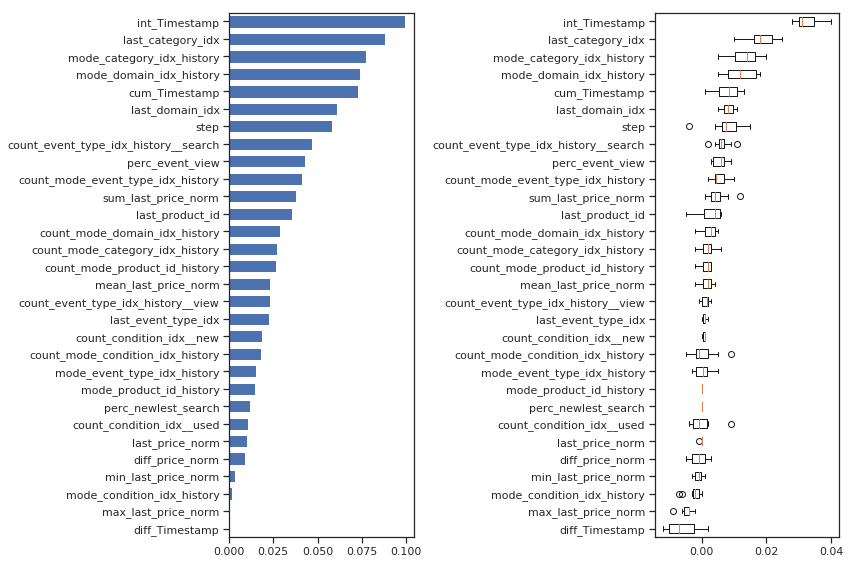

In [50]:
# plot
result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(np.array(features)[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=np.array(features)[tree_importance_sorted_idx])
fig.tight_layout()
plt.show()

## Inference

In [51]:
# df_eval = df_train[['step', 'perc_event_view', "perc_newlest_search",
#               'count_mode_event_type_idx_history','count_event_type_idx_history__search', 'class',
#               'ndcg_ml']]
# df_eval['zero'] = df_eval['ndcg_ml'] == 0
# df_eval
# sns.pairplot(df_eval,  hue="class", height=4)

In [52]:
#SupervisedModelTraining____mars_gym_model_b____06e74a0146_04ea535b60_sub_False
#f_coocorrence  = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____06e74a0146_04ea535b60_sub_False"
#f_most_popular = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____06e74a0146_700919816c_sub_False"
#f_model        = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____06e74a0146_04ea535b60_sub_False"

f_coocorrence  = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____06e74a0146_61dcdb92f7_sub_True"
f_most_popular = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____06e74a0146_d5789bc4c1_sub_True"
f_model        = "/media/workspace/triplet_session/output/evaluation/MLEvaluationTask/results/SupervisedModelTraining____mars_gym_model_b____06e74a0146_80fe3195ca_sub_True"


files = [f_model, f_coocorrence]
names = ["model", 'coocorrence']

path      = files[0]+'/dataset_indexed.csv'
df_pred   = pd.read_csv(path).reset_index()

df_pred[features].head()

,last_category_idx,last_product_id,last_event_type_idx,step,diff_Timestamp,int_Timestamp,cum_Timestamp,last_price_norm,diff_price_norm,last_domain_idx,...,count_mode_condition_idx_history,count_mode_domain_idx_history,count_mode_product_id_history,count_mode_event_type_idx_history,count_event_type_idx_history__search,count_event_type_idx_history__view,count_condition_idx__new,count_condition_idx__used,perc_newlest_search,perc_event_view
0,2946,4,4,20,0,421769,1916,-0.0086,0.0,2029,...,17,17,17,17,1,17,17,0,1.00,0.94
1,1067,11861,4,14,0,403066,597,-0.0086,0.0,1277,...,5,7,4,7,5,7,5,1,0.83,0.58
2,4420,4,4,3,0,394042,0,-0.0086,0.0,2320,...,1,1,1,1,0,1,1,0,1.00,1.00
3,3533,4,4,14,0,409683,5374,-0.0086,0.0,1505,...,5,5,7,7,5,7,2,5,0.29,0.58
4,3688,4582,3,70,0,392693,7553,-0.0086,0.0,812,...,20,12,17,10,10,10,20,0,1.00,0.50


In [53]:
df_pred['model'] = clf.predict(df_pred[features])
df_pred.head()

,index,Unnamed: 0,SessionID,ItemID,Timestamp,event_type_idx,event_search,domain_count,item_id_count,event_type_click,...,count_mode_event_type_idx_history,count_event_type_idx_history__search,count_event_type_idx_history__view,count_condition_idx__new,count_condition_idx__used,perc_newlest_search,perc_event_view,dense_features,Index,model
0,0,0,3,22918,2019-10-20 23:29:11.646,2,[18752],0,1868.0,1,...,17,1,17,17,0,1.00,0.94,"[0.046, 0.193, 0.85, 0.85, 0.85, 0.85, 0.85, 0...",0,model
1,1,1,4,34272,2019-10-07 23:46:48.382,2,[18752],0,34.0,1,...,7,5,7,5,1,0.83,0.58,"[0.031, 0.06, 0.35, 0.25, 0.35, 0.2, 0.35, 0.2...",1,model
2,2,2,0,27908,2019-10-01 17:22:20.697,2,[18752],0,76.0,1,...,1,0,1,1,0,1.00,1.00,"[0.003, 0.0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...",2,model
3,3,3,84373,5998,2019-10-12 14:03:21.871,2,[18752],0,100.0,1,...,7,5,7,2,5,0.29,0.58,"[0.031, 0.541, 0.25, 0.25, 0.25, 0.35, 0.35, 0...",3,model
4,4,4,121348,32166,2019-09-30 18:53:33.520,2,[18752],0,181.0,1,...,10,10,10,20,0,1.00,0.50,"[0.175, 0.76, 0.6, 1.0, 0.6, 0.85, 0.5, 0.5, 0...",4,model


In [54]:
df_pred['model'].value_counts()

model          877
coocorrence    123
Name: model, dtype: int64

In [55]:
# load submission

df_sub = {}
for i in range(len(files)):
    path = files[i]+'/submission_{}.csv'.format(files[i].split("/")[-1])
    _df   = pd.read_csv(path, header=None)
    df_sub[names[i]] = _df

df_sub.keys()

dict_keys(['model', 'coocorrence'])

In [56]:
df_pred['model']

0      model
1      model
2      model
3      model
4      model
       ...  
995    model
996    model
997    model
998    model
999    model
Name: model, Length: 1000, dtype: object

In [57]:
final_sub = []
for i, row in df_pred[['model']].iterrows():
    final_sub.append(list(df_sub[row.model].iloc[i].values))

In [58]:
np.savetxt('final_submission.csv', final_sub, fmt='%i', delimiter=',') 